In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
#One-Hot coding
df = pd.get_dummies(df,columns=['cut','color','clarity'])

In [5]:
#Std Scaling
df = (df - df.mean())/df.std()

In [6]:
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198157,-0.174090,-1.099662,-0.904087,-1.587823,-1.536181,-1.571115,-0.175402,-0.316309,1.225917,...,-0.334291,-0.234341,-0.118019,-0.185266,-0.565356,2.206078,-0.422521,-0.542290,-0.2696,-0.321951
1,-1.240350,-1.360726,1.585514,-0.904087,-1.641310,-1.658759,-1.741159,-0.175402,-0.316309,-0.815701,...,-0.334291,-0.234341,-0.118019,-0.185266,1.768765,-0.453285,-0.422521,-0.542290,-0.2696,-0.321951
2,-1.198157,-3.384987,3.375631,-0.903836,-1.498677,-1.457382,-1.741159,-0.175402,3.161410,-0.815701,...,-0.334291,-0.234341,-0.118019,-0.185266,-0.565356,-0.453285,2.366705,-0.542290,-0.2696,-0.321951
3,-1.071577,0.454129,0.242926,-0.902081,-1.364959,-1.317293,-1.287708,-0.175402,-0.316309,-0.815701,...,2.991353,-0.234341,-0.118019,-0.185266,-0.565356,-0.453285,-0.422521,1.843998,-0.2696,-0.321951
4,-1.029384,1.082348,0.242926,-0.901831,-1.240155,-1.212227,-1.117663,-0.175402,3.161410,-0.815701,...,-0.334291,4.267208,-0.118019,-0.185266,-0.565356,2.206078,-0.422521,-0.542290,-0.2696,-0.321951


In [7]:
#Outliers Imputing (z-score)
def out(df,col):
    df.loc[df[col]>3,col]=3
    df.loc[df[col]<-3,col]=-3
    return df

for i in df.columns:
    df = out(df,i)

In [8]:
df.shape

(53940, 27)

In [9]:
#PCA
from sklearn.decomposition import PCA

In [10]:
pcaModel = PCA(random_state=117)

In [11]:
pcaModel.fit(df)

PCA(random_state=117)

In [15]:
trans_data = pcaModel.transform(df)
trans_data = pd.DataFrame(trans_data,index=df.index)

In [16]:
trans_data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-3.063573,0.716957,0.038488,-0.754436,0.822918,0.284035,3.085753,-0.684286,-0.609676,-0.085527,...,-0.179253,-0.042554,-0.358367,0.773672,0.008390,0.015551,0.010564,-2.740863e-16,1.595946e-16,-1.589007e-15
1,-2.748524,-3.258908,-0.214592,-1.318058,-1.188341,-1.048010,0.752053,-1.472495,-0.892209,-1.170852,...,0.002631,-0.180668,-0.355464,0.707999,0.091535,0.075093,-0.014403,2.348816e-15,2.546574e-15,-1.075529e-15
2,-2.696686,-3.311844,-0.764465,0.705730,-0.229736,-0.376407,1.290984,-1.960189,-1.384410,1.764393,...,-0.013319,0.221377,-0.320093,0.501384,0.144132,0.111052,-0.004614,3.500672e-15,2.713108e-15,-1.949829e-15
3,-2.076214,-1.420975,-1.144885,-1.102011,0.665512,-0.997911,-1.447749,-0.292858,-0.627634,1.736182,...,-0.065195,-0.233647,-0.222757,0.429847,-0.036388,-0.006524,0.036343,-3.157197e-16,5.197232e-15,-4.302114e-15
4,-1.655577,-0.971614,1.174453,0.195709,0.336043,1.211290,1.753563,1.228387,-0.614791,2.072646,...,-0.057716,-0.285208,-0.478466,0.826327,-0.289931,-0.033189,-0.009636,2.751271e-15,-5.336009e-15,-7.979728e-16


In [17]:
pcaModel.components_[2]

array([-1.92048094e-04,  3.44551712e-01, -7.58229530e-02, -5.54966976e-02,
       -1.29870886e-02, -5.02947885e-03,  3.38679298e-02,  5.20213355e-02,
        2.20599679e-01, -1.34719457e-01, -4.37458818e-01,  4.17161702e-01,
        1.45609890e-01,  9.28089365e-02,  2.32605275e-03, -3.22271750e-01,
        8.68300582e-02,  3.98867124e-02,  9.24524331e-03,  3.78037386e-03,
       -2.94192138e-02,  4.54627431e-01, -1.14318300e-02, -1.96516468e-01,
       -2.08726168e-01, -3.19895999e-02, -4.89781111e-02])

In [18]:
pcaModel.explained_variance_ratio_*100

array([2.12117108e+01, 8.22965800e+00, 6.17787717e+00, 5.63967570e+00,
       5.50873763e+00, 5.20499350e+00, 5.15733610e+00, 5.06188123e+00,
       4.96023680e+00, 4.86305855e+00, 4.79610649e+00, 4.44079333e+00,
       4.10910986e+00, 3.65375465e+00, 2.98786201e+00, 2.40202043e+00,
       1.91997697e+00, 1.51550828e+00, 1.05622509e+00, 6.56316209e-01,
       3.67074627e-01, 5.50984466e-02, 1.94750082e-02, 5.51312753e-03,
       7.90333884e-15, 1.28761547e-15, 2.03809599e-16])

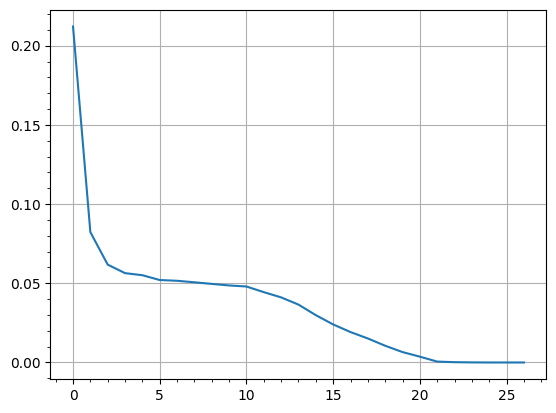

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(df.shape[1]), pcaModel.explained_variance_ratio_)
plt.grid(True)
plt.minorticks_on()

In [20]:
pcaModel1 = PCA(n_components=0.95,random_state=117)
pcaModel1.fit(df)

PCA(n_components=0.95, random_state=117)

In [21]:
trans_data1 = pcaModel1.transform(df)
trans_data1 = pd.DataFrame(trans_data1)

In [22]:
trans_data1.shape

(53940, 17)